In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#% matplotlib inline

import pylab 
import scipy.stats as stats

In [36]:
data = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

In [37]:
data.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [38]:
c = pd.read_csv('Eniola_train.csv')
d = pd.read_csv('Eniola_test.csv')
data  = pd.merge(data,c ,on=['ID'],how='left')
test  = pd.merge(test,d ,on=['ID'],how='left')

In [39]:
#data.to_csv('fadtrain.csv',index = False)
#test.to_csv('fadtest.csv',index = False)
data.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification,district,region
0,5086,98,2,3,1,1,2,2,0,0,...,4,-4.460442,29.811396,0,0,0,0,0,Kasulu,Kigoma
1,1258,40,1,1,3,5,1,1,1,0,...,4,-6.176438,39.244871,1,1,1,0,3,Zanzibar,Zanzibar
2,331,18,2,4,6,3,2,1,0,0,...,1,-6.825702,37.652798,1,0,0,0,2,Morogoro Urban,Morogoro
3,6729,50,1,1,3,1,1,1,0,0,...,4,-3.372049,35.808307,1,0,1,0,3,Karatu,Arusha
4,8671,34,1,1,1,1,2,1,0,1,...,4,-7.179645,31.039095,1,1,0,1,3,Mpanda,Rukwa


In [40]:
a = pd.read_csv('lat2dat.csv')
b = pd.read_csv('lat2test.csv')

In [41]:
data.drop(['mobile_money', 'savings', 'borrowing', 'insurance'], axis = 1,inplace = True)

#distest = pd.read_csv("districttest.csv")
#distrain= pd.read_csv('districttrain.csv')
#trreg = pd.read_csv('trainregion.csv')
#testreg = pd.read_csv('testregion.csv')
#distrain.drop('region',axis =1 ,inplace = True)
#data = pd.concat([data,distrain,trreg,a], axis = 1)
#test = pd.concat([test,distest,testreg,b], axis = 1)

data = pd.concat([data,a], axis = 1)

test = pd.concat([test,b], axis = 1)



In [42]:
ntrain = data.shape[0]
ntest = test.shape[0]

all_data = pd.concat((data, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (9459, 37)


C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [43]:
geopy_data = pd.read_csv('without_sorting_geopy.csv')

In [44]:
geopy_data.columns

Index(['Latitude', 'Longitude', 'address', 'hehe', 'first', 'second', 'third'], dtype='object')

In [45]:
geopy_data.drop([ 'address', 'hehe'], axis =1 ,inplace = True)

In [46]:
geopy_data.head()

,Latitude,Longitude,first,second,third
0,-4.460442,29.811396,Manyovu,Kasulu,Western Zone
1,-6.176438,39.244871,Mombasa,Zanzibar City,71201
2,-6.825702,37.652798,Forest Hill,Morogoro,6284
3,-3.372049,35.808307,Mto wa Mbu,Karatu,Northern Zone
4,-7.179645,31.039095,R549,Kizi,Western Zone


In [47]:
geopy_data.drop([ 'Latitude', 'Longitude',  'second', 'third'], axis =1 ,inplace = True)

In [48]:
geopy_data.columns

Index(['first'], dtype='object')

In [53]:
geopy_data['fir'] = geopy_data['first'].str[0]

In [55]:
geopy_data.drop([ 'first'], axis =1 ,inplace = True)

In [56]:
all_data = pd.concat([all_data,geopy_data], axis = 1)


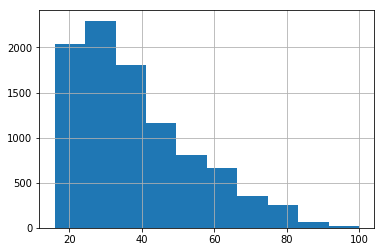

In [57]:
all_data.Q1.hist()

In [58]:
all_data.Q1.max()

100

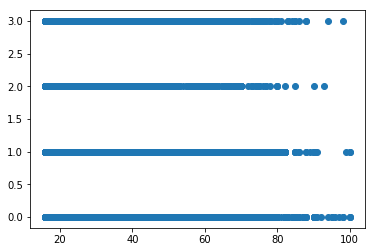

In [59]:
plt.scatter(x = all_data.Q1,y = all_data.mobile_money_classification)

C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


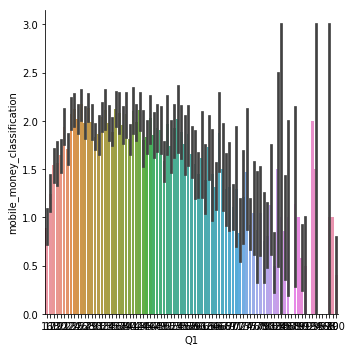

In [60]:
sns.factorplot(x='Q1',y='mobile_money_classification',data=all_data,kind='bar')

In [61]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,Q8_7,Q8_8,Q8_9,Q9,district,latitude2,longitude,mobile_money_classification,region,fir
0,5086,-4.460442,29.811396,98,-1,-1,2,-1,2,-1,...,0,0,1,-1,Kasulu,-4.57268,30.11092,0.0,Kigoma,M
1,1258,-6.176438,39.244871,40,-1,-1,1,4,1,5,...,0,0,0,1,Zanzibar,-6.16875,39.20243,3.0,Zanzibar,M
2,331,-6.825702,37.652798,18,-1,-1,2,-1,2,-1,...,0,0,1,-1,Morogoro Urban,-6.82282,37.67290,2.0,Morogoro,F
3,6729,-3.372049,35.808307,50,-1,-1,1,2,2,-1,...,0,0,0,-1,Karatu,-3.33868,35.67410,3.0,Arusha,M
4,8671,-7.179645,31.039095,34,1,-1,2,-1,1,1,...,0,0,0,-1,Mpanda,-7.50237,31.03970,3.0,Rukwa,R


In [62]:
cols_to_use = data.columns

In [63]:
# let's plot the histograms to have an impression of the distribution of the numerical variables
#for col in cols_to_use:
 #   fig = all_data[col].hist(bins=50)
  #  fig.set_xlabel(col)
   # fig.set_label('fin inclusion')
    #plt.show() ''''
    
    # plot the numerical columns vs the output SalePrice to visualise the (linear) relationship

#for col in cols_to_use[:-3]:
 #   data.plot.scatter(x=col, y='mobile_money_classification', ylim=(0,4))
  #  plt.show()

In [64]:
all_data = all_data.replace(-1,0)

In [65]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,Q8_7,Q8_8,Q8_9,Q9,district,latitude2,longitude,mobile_money_classification,region,fir
0,5086,-4.460442,29.811396,98,0,0,2,0,2,0,...,0,0,1,0,Kasulu,-4.57268,30.11092,0.0,Kigoma,M
1,1258,-6.176438,39.244871,40,0,0,1,4,1,5,...,0,0,0,1,Zanzibar,-6.16875,39.20243,3.0,Zanzibar,M
2,331,-6.825702,37.652798,18,0,0,2,0,2,0,...,0,0,1,0,Morogoro Urban,-6.82282,37.67290,2.0,Morogoro,F
3,6729,-3.372049,35.808307,50,0,0,1,2,2,0,...,0,0,0,0,Karatu,-3.33868,35.67410,3.0,Arusha,M
4,8671,-7.179645,31.039095,34,1,0,2,0,1,1,...,0,0,0,0,Mpanda,-7.50237,31.03970,3.0,Rukwa,R


In [66]:
data.Q16.unique()

array([1, 4, 5, 3, 2], dtype=int64)

In [67]:
#all_data['hm'] = all_data['Q1']/all_data['Q16']
all_data['hm'] = all_data['Q1']/all_data['Q16']


In [68]:

#all_data['distance1'] = np.sqrt((data.latitude2 - data.Latitude) ** 2 + (data.longitude - data.Longitude) ** 2)
import math

In [69]:
#np.radians(data.Latitude)

In [70]:
from math import sin, cos, sqrt, atan2
def calculate_distance(Latitude, Longitude, latitude2, longitude):
    R = 6373.0

    Latitude = np.radians(Latitude)
    Longitude = np.radians(Longitude)
    latitude2 = np.radians(latitude2)
    longitude = np.radians(longitude)

    dlon = longitude - Longitude
    dlat = latitude2 - Latitude

    a = np.sin(dlat / 2)**2 + np.cos(Latitude) * np.cos(latitude2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

In [71]:
all_data['distance'] = calculate_distance(**all_data[['Latitude', 'Longitude', 'latitude2', 'longitude']])


In [72]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,Q8_9,Q9,district,latitude2,longitude,mobile_money_classification,region,fir,hm,distance
0,5086,-4.460442,29.811396,98,0,0,2,0,2,0,...,1,0,Kasulu,-4.57268,30.11092,0.0,Kigoma,M,98.0,35.481343
1,1258,-6.176438,39.244871,40,0,0,1,4,1,5,...,0,1,Zanzibar,-6.16875,39.20243,3.0,Zanzibar,M,10.0,4.770566
2,331,-6.825702,37.652798,18,0,0,2,0,2,0,...,1,0,Morogoro Urban,-6.82282,37.67290,2.0,Morogoro,F,18.0,2.243147
3,6729,-3.372049,35.808307,50,0,0,1,2,2,0,...,0,0,Karatu,-3.33868,35.67410,3.0,Arusha,M,12.5,15.357533
4,8671,-7.179645,31.039095,34,1,0,2,0,1,1,...,0,0,Mpanda,-7.50237,31.03970,3.0,Rukwa,R,34.0,35.896694


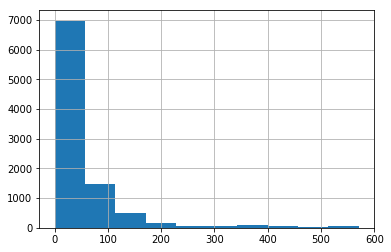

In [73]:
all_data.distance.hist()

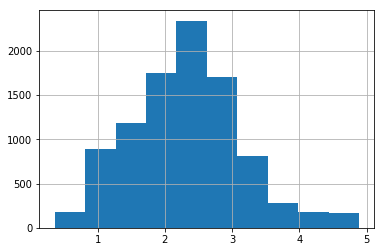

In [74]:
(all_data.distance**(1/4)).hist()

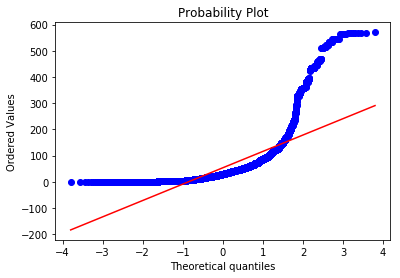

In [75]:
# and the Q-Q plot
stats.probplot(all_data.distance, dist="norm", plot=pylab)
pylab.show()

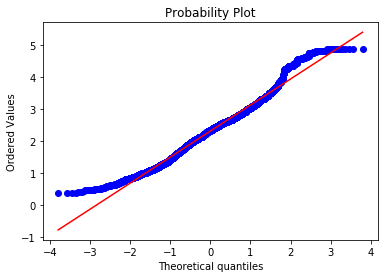

In [76]:
# and the Q-Q plot
stats.probplot((all_data.distance**(1/4)), dist="norm", plot=pylab)
pylab.show()

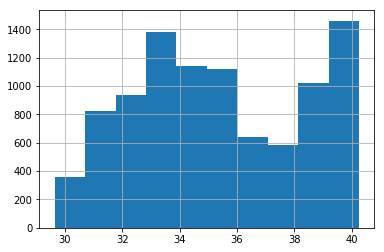

In [77]:
all_data.Longitude.hist()

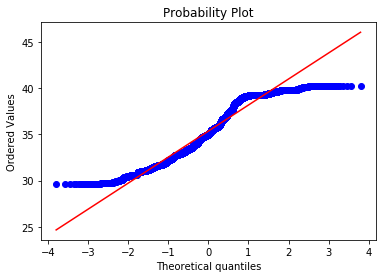

In [78]:
# and the Q-Q plot
stats.probplot(all_data.Longitude, dist="norm", plot=pylab)
pylab.show()

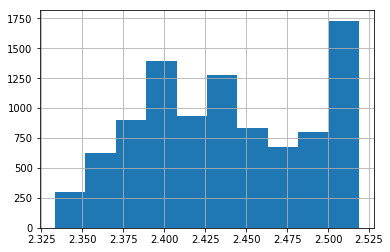

In [79]:
(all_data.Longitude**(1/4)).hist()

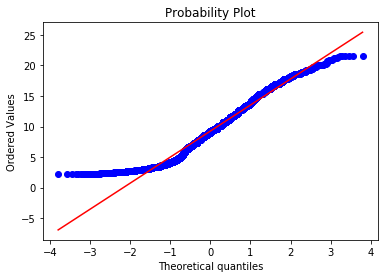

In [80]:
# and the Q-Q plot
stats.probplot((all_data.hm**(1/1.5)), dist="norm", plot=pylab)
pylab.show()

In [81]:
# let's add the transformed variables to the dataset
all_data['distance_transformed'] = all_data.distance**(1/4)
#all_data['lon_TRANSFORMED'] = all_data.Longitude**(1/1.5)


In [82]:


#created features corresponding to alternative coordinate systems
#x = xcos + ysin
#y = ycos - xsin
#all_data["rot45X"] = .707* all_data["Longitude"] + .707* all_data["Latitude"] 
#all_data["rot45Y"] = .707* all_data["Longitude"] - .707* all_data["Latitude"]

#all_data["rot30X"] = (1.732/2)* all_data["Latitude"] + (1./2)* all_data["Longitude"]
#all_data["rot30Y"] = (1.732/2)* all_data["Longitude"] - (1./2)* all_data["Latitude"]

#all_data["rot60X"] = (1./2)* all_data["Latitude"] + (1.732/2)* all_data["Longitude"] 
#all_data["rot60Y"] = (1./2)* all_data["Longitude"] - (1.732/2)* all_data["Latitude"]

#all_data["radial_r"] = np.sqrt( np.power(all_data["Longitude"],2) + np.power(all_data["Latitude"],2) )

In [83]:
#all_data['x'] = np.cos(all_data.Latitude) * np.cos(all_data.Longitude)
#all_data['y'] = np.cos(all_data.Latitude) * np.sin(all_data.Longitude) 
#all_data['z'] = np.sin(all_data.Latitude) 
#df['ATAN'] = np.arctan(df['SWD']/df['CWD'])


Text(0, 0.5, 'Frequency')

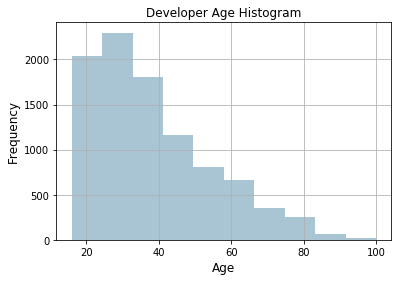

In [84]:



fig, ax = plt.subplots()  
all_data['Q1'].hist(color='#A9C5D3')  
ax.set_title('Developer Age Histogram', fontsize=12)   
ax.set_xlabel('Age', fontsize=12)  
ax.set_ylabel('Frequency', fontsize=12)


In [85]:
all_data['Age_bin_round'] = np.array(np.floor(np.array(all_data['Q1']) /10.))

In [86]:
all_data.Age_bin_round.unique()

array([ 9.,  4.,  1.,  5.,  3.,  2.,  7.,  8.,  6., 10.])

In [87]:
#all_data['latlong'] = all_data.Longitude + all_data.Latitude

In [88]:
all_data['latlong'] = all_data.Longitude + all_data.Latitude

In [89]:
#Columns = [  'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
 #      'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
  #     'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', '', 'Q17', 'Q18', 'Q19']

In [90]:
#Columns = [ 'Q13',  'Q3']
Columns = [  'Q3']

In [91]:
all_data[Columns] = all_data[Columns].astype(str)

In [92]:
#all_data[Columns] = all_data[Columns].astype(float)

In [93]:
#[feat for feat in all_data.columns if all_data[feat].std() == 0 ]

In [94]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,latitude2,longitude,mobile_money_classification,region,fir,hm,distance,distance_transformed,Age_bin_round,latlong
0,5086,-4.460442,29.811396,98,0,0,2,0,2,0,...,-4.57268,30.11092,0.0,Kigoma,M,98.0,35.481343,2.440619,9.0,25.350954
1,1258,-6.176438,39.244871,40,0,0,1,4,1,5,...,-6.16875,39.20243,3.0,Zanzibar,M,10.0,4.770566,1.477891,4.0,33.068433
2,331,-6.825702,37.652798,18,0,0,2,0,2,0,...,-6.82282,37.67290,2.0,Morogoro,F,18.0,2.243147,1.223811,1.0,30.827096
3,6729,-3.372049,35.808307,50,0,0,1,2,2,0,...,-3.33868,35.67410,3.0,Arusha,M,12.5,15.357533,1.979613,5.0,32.436258
4,8671,-7.179645,31.039095,34,1,0,2,0,1,1,...,-7.50237,31.03970,3.0,Rukwa,R,34.0,35.896694,2.447731,3.0,23.859450


In [95]:
all_data.groupby(['Q3'])['mobile_money_classification'].mean().sort_values()

Q3
3    1.324484
2    1.793304
1    1.847625
4    1.889077
Name: mobile_money_classification, dtype: float64

In [96]:
all_data.groupby(['Q3'])['mobile_money_classification'].mean().sort_values().index

Index(['3', '2', '1', '4'], dtype='object', name='Q3')

In [97]:
all_data.Q3.unique()

array(['3', '1', '4', '2'], dtype=object)

In [98]:
ordered_labels = all_data.groupby(['Q3'])['mobile_money_classification'].mean().sort_values().index

In [99]:
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
ordinal_label

{'3': 0, '2': 1, '1': 2, '4': 3}

In [100]:
all_data['Q3_ordered'] = all_data.Q3.map(ordinal_label)


In [101]:
# ordering the cat variables

In [102]:
all_data.groupby(['Q4'])['mobile_money_classification'].mean().sort_values()

Q4
1    1.058382
2    1.386233
5    1.867238
3    1.977655
4    2.294118
6    2.444915
8    2.500000
7    2.833333
Name: mobile_money_classification, dtype: float64

In [103]:
ordered_labels = all_data.groupby(['Q4'])['mobile_money_classification'].mean().sort_values().index
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
ordinal_label

{1: 0, 2: 1, 5: 2, 3: 3, 4: 4, 6: 5, 8: 6, 7: 7}

In [104]:
all_data['Q4_ordered'] = all_data.Q4.map(ordinal_label)


Text(0, 0.5, 'fin')

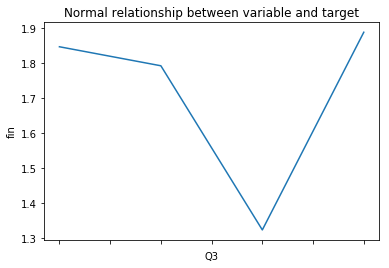

In [105]:
# let's inspect the newly created monotonic relationship with the target

#first we plot the original variable for comparison, there is no monotonic relationship

fig = plt.figure()
fig = all_data.groupby(['Q3'])['mobile_money_classification'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('fin')

In [106]:
# let's inspect the newly created monotonic relationship with the target

#first we plot the original variable for comparison, there is no monotonic relationship

#fig = plt.figure()
#fig = all_data.groupby(['Q3_ordered'])['mobile_money_classification'].mean().plot()
#fig.set_title('Normal relationship between variable and target')
#fig.set_ylabel('fin')

In [107]:
all_data.Q4.head()

0    1
1    3
2    6
3    3
4    1
Name: Q4, dtype: int64

In [108]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,mobile_money_classification,region,fir,hm,distance,distance_transformed,Age_bin_round,latlong,Q3_ordered,Q4_ordered
0,5086,-4.460442,29.811396,98,0,0,2,0,2,0,...,0.0,Kigoma,M,98.0,35.481343,2.440619,9.0,25.350954,0,0
1,1258,-6.176438,39.244871,40,0,0,1,4,1,5,...,3.0,Zanzibar,M,10.0,4.770566,1.477891,4.0,33.068433,2,3
2,331,-6.825702,37.652798,18,0,0,2,0,2,0,...,2.0,Morogoro,F,18.0,2.243147,1.223811,1.0,30.827096,3,5
3,6729,-3.372049,35.808307,50,0,0,1,2,2,0,...,3.0,Arusha,M,12.5,15.357533,1.979613,5.0,32.436258,2,3
4,8671,-7.179645,31.039095,34,1,0,2,0,1,1,...,3.0,Rukwa,R,34.0,35.896694,2.447731,3.0,23.859450,2,0


In [109]:
all_data.drop(['distance','Q1','ID', 'Latitude',"Longitude",'latitude2','longitude'], axis = 1,inplace = True)
#all_data.drop(['ID', 'Latitude',"Longitude",'latitude2','longitude'], axis = 1,inplace = True)
#all_data.drop(['Q1','ID', 'Latitude','latitude2','longitude'], axis = 1,inplace = True)


In [110]:
#all_data.drop('hm',axis = 1,inplace =True)
all_data.drop(['Q4'], axis = 1,inplace = True)

In [111]:
all_data.columns

Index(['Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_10', 'Q8_11', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q9', 'district',
       'mobile_money_classification', 'region', 'fir', 'hm',
       'distance_transformed', 'Age_bin_round', 'latlong', 'Q3_ordered',
       'Q4_ordered'],
      dtype='object')

In [112]:
#all_data["std"] = all_data.std(axis=1)

In [113]:
#all_data["Mean"] = all_data.mean(axis =1)

In [114]:
#all_data.isnull().sum()
#all_data["sum"] = all_data.sum(axis  =1)

In [115]:
#from pygeocoder import Geocoder

In [116]:
all_data.head()

,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,...,district,mobile_money_classification,region,fir,hm,distance_transformed,Age_bin_round,latlong,Q3_ordered,Q4_ordered
0,0,0,2,0,2,0,1,0,4,4,...,Kasulu,0.0,Kigoma,M,98.0,2.440619,9.0,25.350954,0,0
1,0,0,1,4,1,5,4,4,1,4,...,Zanzibar,3.0,Zanzibar,M,10.0,1.477891,4.0,33.068433,2,3
2,0,0,2,0,2,0,1,0,1,1,...,Morogoro Urban,2.0,Morogoro,F,18.0,1.223811,1.0,30.827096,3,5
3,0,0,1,2,2,0,4,0,1,4,...,Karatu,3.0,Arusha,M,12.5,1.979613,5.0,32.436258,2,3
4,1,0,2,0,1,1,1,0,1,4,...,Mpanda,3.0,Rukwa,R,34.0,2.447731,3.0,23.859450,2,0


In [117]:
#import geocoder
all_data = pd.get_dummies(all_data)



In [118]:
# remove constant features
[feat for feat in all_data.columns if all_data[feat].std() == 0]


[]

In [119]:

#Get the new dataset
data = all_data[:ntrain]
test = all_data[ntrain:]

In [120]:
data.head()

,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,...,fir_Z,fir_b,fir_f,fir_h,fir_j,fir_k,fir_m,fir_n,fir_o,fir_w
0,0,0,2,0,2,0,1,0,4,4,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,4,1,5,4,4,1,4,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,2,2,0,4,0,1,4,...,0,0,0,0,0,0,0,0,0,0
4,1,0,2,0,1,1,1,0,1,4,...,0,0,0,0,0,0,0,0,0,0


In [121]:
test.head()

,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,...,fir_Z,fir_b,fir_f,fir_h,fir_j,fir_k,fir_m,fir_n,fir_o,fir_w
7094,0,1,1,6,1,4,5,0,1,4,...,0,0,0,0,0,0,0,0,0,0
7095,1,0,2,0,1,4,1,0,1,4,...,0,0,0,0,0,0,0,0,0,0
7096,0,0,1,4,1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7097,1,0,2,0,2,0,1,0,1,4,...,0,0,0,0,0,0,0,0,0,0
7098,0,0,1,4,1,6,4,3,1,2,...,0,0,0,0,0,0,0,0,0,0


In [122]:
test.drop("mobile_money_classification",axis = 1,inplace = True)

C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [123]:
sample = pd.read_csv("sample_submission.csv")
sample.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.3,0.5,0.1,0.2
1,8208,0.3,0.5,0.1,0.2
2,2785,0.3,0.5,0.1,0.2
3,2967,0.3,0.5,0.1,0.2
4,1697,0.3,0.5,0.1,0.2


In [124]:
data.columns

Index(['Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       ...
       'fir_Z', 'fir_b', 'fir_f', 'fir_h', 'fir_j', 'fir_k', 'fir_m', 'fir_n',
       'fir_o', 'fir_w'],
      dtype='object', length=217)

In [125]:
#d = {"s": [1,1,1,1,1,1,1,1,1,]}
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [126]:
#a = pd.DataFrame(d)
#a.s.std()

In [127]:
sample.head(1)

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.3,0.5,0.1,0.2


In [128]:

data.columns

Index(['Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       ...
       'fir_Z', 'fir_b', 'fir_f', 'fir_h', 'fir_j', 'fir_k', 'fir_m', 'fir_n',
       'fir_o', 'fir_w'],
      dtype='object', length=217)

In [129]:

#data.to_csv('mytrain.csv',index = False)
#test.to_csv('mytest.csv',index = False)

In [130]:
#from skmultilearn.problem_transform import ClassifierChain


In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
from xgboost import XGBClassifier
#from tpot import TPOTClassifier

In [133]:
#data = pd.read_csv("training.csv")
#test = pd.read_csv("test.csv")
#data.drop(['mobile_money', 'savings', 'borrowing', 'insurance'], axis = 1,inplace = True)
#data.drop("ID", axis = 1,inplace =True)
#test.drop("ID", axis = 1,inplace =True)


In [134]:

X= data.drop( 'mobile_money_classification', axis = 1)
y = data["mobile_money_classification"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [135]:
y_train.head()

3849    3.0
307     1.0
1278    3.0
3142    1.0
4706    3.0
Name: mobile_money_classification, dtype: float64

In [136]:
data.shape

(7094, 217)

In [137]:
#model = BinaryRelevance(LogisticRegression())
from sklearn.tree import DecisionTreeClassifier 
#dtree_model = DecisionTreeClassifier(max_depth = 2)
#mod = XGBClassifier(n_estimators= 200, max_depth=5)
from lightgbm import LGBMClassifier
#model = XGBClassifier(n_estimators= 500,max_depth= 5, gamma=1)
#model = XGBClassifier(n_estimators= 200, max_depth=5)
#1.33680339327269
import xgboost as xgb

In [138]:
# from catboost import CatBoostClassifier
# params = {'depth':[3,1,2,6,4,5,7,8,9,10],
#           'iterations':[250,100,500,1000],
#           'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
#           'l2_leaf_reg':[3,1,5,10,100],
#           'border_count':[32,5,10,20,50,100,200],
#           'ctr_border_count':[50,5,10,20,100,200],
#           'thread_count':4}


In [139]:
# classifier = CatBoostClassifier(
# iterations = 100,
#     learning_rate= 0.2,
#               l2_leaf_reg= 5,

# loss_function='MultiClass',
# thread_count=8,
# )


In [140]:
# classifier = CatBoostClassifier(
        
# max_depth= 3,
#     learning_rate= 0.1,
# n_estimators=250,
# loss_function='MultiClass')


In [141]:
#rf = XGBClassifier(max_depth=7, learning_rate=0.1, n_estimators=100, silent=True, objective='binary:logistic', nthread=-1, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)


In [142]:
model = XGBClassifier(
          n_estimators= 250)


In [143]:
#test[Columns] = test[Columns].astype(str)
from sklearn.metrics import log_loss

In [144]:
#
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [145]:
pred = model.predict_proba(X_test)
log_loss(y_test,pred)

0.7446813328754194

In [146]:
#pred = model.predict_proba(X_test)
#log_loss(y_test,pred)

In [147]:
#0.7427861171554968
#0.7427861147425446


In [148]:
pred = model.predict_proba(X_test)
log_loss(y_test,pred)

0.7446813328754194

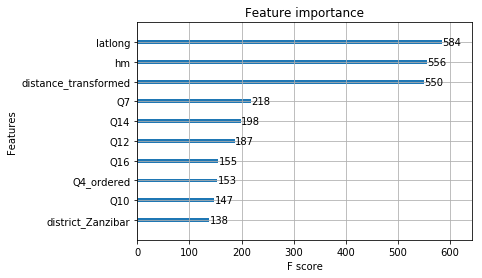

In [149]:
import matplotlib.pyplot as plt
xgb.plot_importance(model,max_num_features=10)
plt.rcParams['figure.figsize'] = [15, 5]

In [150]:
model.fit(data.drop(["mobile_money_classification"], axis =1), data["mobile_money_classification"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [151]:
#test = pd.get_dummies(test)

In [152]:
model.predict(test)

array([3., 3., 3., ..., 1., 1., 0.])

In [153]:
sample.columns

Index(['ID', 'no_financial_services', 'other_only', 'mm_only', 'mm_plus'], dtype='object')

In [154]:
model.predict_proba(test)

array([[6.7183078e-04, 2.9535377e-03, 1.7699717e-01, 8.1937748e-01],
       [2.0427326e-02, 4.3625947e-02, 1.3657954e-01, 7.9936719e-01],
       [5.5524602e-04, 4.9672513e-03, 1.0714394e-01, 8.8733351e-01],
       ...,
       [2.5838676e-01, 5.8550406e-01, 3.2999951e-02, 1.2310927e-01],
       [3.0770251e-01, 4.3001345e-01, 8.6623669e-02, 1.7566040e-01],
       [6.0703772e-01, 3.6990494e-01, 1.3411866e-02, 9.6454686e-03]],
      dtype=float32)

In [155]:
model.predict_proba(test)

array([[6.7183078e-04, 2.9535377e-03, 1.7699717e-01, 8.1937748e-01],
       [2.0427326e-02, 4.3625947e-02, 1.3657954e-01, 7.9936719e-01],
       [5.5524602e-04, 4.9672513e-03, 1.0714394e-01, 8.8733351e-01],
       ...,
       [2.5838676e-01, 5.8550406e-01, 3.2999951e-02, 1.2310927e-01],
       [3.0770251e-01, 4.3001345e-01, 8.6623669e-02, 1.7566040e-01],
       [6.0703772e-01, 3.6990494e-01, 1.3411866e-02, 9.6454686e-03]],
      dtype=float32)

In [156]:
pred = pd.DataFrame(model.predict_proba(test),columns= [ 'no_financial_services', 'other_only', 'mm_only', 'mm_plus'])

In [157]:
pred = pd.concat([sample["ID"], pred], axis =1)

In [158]:
#pred  =np.round(pred,3)
pred.head()


,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000672,0.002954,0.176997,0.819377
1,8208,0.020427,0.043626,0.136580,0.799367
2,2785,0.000555,0.004967,0.107144,0.887334
3,2967,0.355458,0.578446,0.016234,0.049862
4,1697,0.000159,0.001798,0.105972,0.892072


In [159]:
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000672,0.002954,0.176997,0.819377
1,8208,0.020427,0.043626,0.136580,0.799367
2,2785,0.000555,0.004967,0.107144,0.887334
3,2967,0.355458,0.578446,0.016234,0.049862
4,1697,0.000159,0.001798,0.105972,0.892072


In [162]:
pred.to_csv("ffromgeopy.csv", index = False)

In [352]:
from sklearn.neural_network import MLPClassifier

In [353]:
ml = MLPClassifier()

In [354]:
ml.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [ ]:
pred = m.predict_proba(X_test)
log_loss(y_test,pred)

In [342]:
from tpot import TPOTClassifier
tp = TPOTClassifier()

In [343]:
tp.fit(X_train,y_train)

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=100,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=100,
        random_state=None, scoring=None, subsample=1.0, use_dask=False,
        verbosity=0, warm_start=False)

In [345]:
pred = tp.predict_proba(X_test)
log_loss(y_test,pred)

0.8114636634202856

In [346]:
tp.predict_proba(test)

array([[2.77013473e-04, 2.60077844e-04, 2.89703502e-01, 7.09759407e-01],
       [5.14000743e-02, 1.51701372e-01, 1.60992348e-01, 6.35906206e-01],
       [5.05462225e-03, 1.23219108e-02, 1.86014877e-01, 7.96608590e-01],
       ...,
       [1.63112523e-01, 5.61880361e-01, 5.47784775e-02, 2.20228638e-01],
       [3.13169477e-01, 4.10674005e-01, 1.02654679e-01, 1.73501839e-01],
       [5.63375996e-01, 3.13851402e-01, 6.37273244e-02, 5.90452781e-02]])

In [348]:
pred = pd.DataFrame(tp.predict_proba(test),columns= [ 'no_financial_services', 'other_only', 'mm_only', 'mm_plus'])

In [349]:
pred = pd.concat([sample["ID"], pred], axis =1)

In [350]:
#pred.to_csv("lee1.csv", index = False).055
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000277,0.000260,0.289704,0.709759
1,8208,0.051400,0.151701,0.160992,0.635906
2,2785,0.005055,0.012322,0.186015,0.796609
3,2967,0.385924,0.416714,0.069600,0.127762
4,1697,0.000231,0.000335,0.207640,0.791794


In [351]:
#pred.to_csv('tpot.csv',index = False)

In [368]:
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000531,0.002930,0.174186,0.822353
1,8208,0.018649,0.041809,0.141993,0.797549
2,2785,0.000644,0.005596,0.099169,0.894591
3,2967,0.371044,0.563401,0.018079,0.047476
4,1697,0.000242,0.001635,0.109014,0.889110


In [231]:
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000551,0.002591,0.163596,0.833262
1,8208,0.019157,0.043448,0.159505,0.777890
2,2785,0.000644,0.006204,0.100589,0.892563
3,2967,0.394459,0.547110,0.014608,0.043823
4,1697,0.000219,0.001188,0.099463,0.899131


In [204]:
pred

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000881,0.002235,0.098616,0.898267
1,8208,0.017272,0.048528,0.169924,0.764275
2,2785,0.001374,0.008014,0.116767,0.873845
3,2967,0.551190,0.380320,0.016913,0.051577
4,1697,0.001106,0.001920,0.106720,0.890255
5,4794,0.016891,0.064759,0.154984,0.763366
6,2675,0.027081,0.061783,0.167354,0.743782
7,2989,0.000585,0.001976,0.232294,0.765145
8,1634,0.393930,0.460690,0.073564,0.071817
9,4147,0.015903,0.069557,0.107325,0.807215


In [205]:
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.001780,0.003859,0.173364,0.820997
1,8208,0.023208,0.052196,0.174839,0.749757
2,2785,0.002796,0.011820,0.086509,0.898875
3,2967,0.344809,0.563982,0.019978,0.071232
4,1697,0.001681,0.002970,0.092202,0.903147


In [2]:
import pandas as pd

In [952]:
a = pd.read_csv("notleastxgb.csv")
b= pd.read_csv('lordOfMercy1.csv')
#c = pd.read_csv('engine4.csv')

In [953]:
a.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000531,0.002930,0.174186,0.822353
1,8208,0.018649,0.041809,0.141993,0.797549
2,2785,0.000644,0.005596,0.099169,0.894591
3,2967,0.371044,0.563401,0.018079,0.047476
4,1697,0.000242,0.001635,0.109014,0.889110


In [219]:
#pd.read_csv("jago.csv")

In [954]:
pred = (0.3*a+0.7*b)

In [955]:
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352.0,0.000597,0.002457,0.177988,0.818957
1,8208.0,0.020782,0.044579,0.150549,0.784090
2,2785.0,0.000560,0.005506,0.101921,0.892013
3,2967.0,0.373219,0.561084,0.017132,0.048566
4,1697.0,0.000166,0.001552,0.101391,0.896891


In [956]:
b.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000625,0.002255,0.179618,0.817502
1,8208,0.021697,0.045766,0.154215,0.778322
2,2785,0.000524,0.005467,0.103100,0.890908
3,2967,0.374151,0.560091,0.016726,0.049033
4,1697,0.000134,0.001516,0.098125,0.900225


In [957]:
pred.drop("ID", axis = 1, inplace = True)

In [958]:
pred = pd.concat([sample["ID"], pred], axis = 1)

In [959]:
pred.to_csv("amalar.csv",index = False)

In [960]:
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000597,0.002457,0.177988,0.818957
1,8208,0.020782,0.044579,0.150549,0.784090
2,2785,0.000560,0.005506,0.101921,0.892013
3,2967,0.373219,0.561084,0.017132,0.048566
4,1697,0.000166,0.001552,0.101391,0.896891
